In [177]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [178]:
df = pd.read_csv('Combined_QB.csv')  # Replace with your actual data
metric = 'Current_PFF'  # Specify the metric you want to predict

In [179]:
print(df.columns)

Index(['Unnamed: 0', 'Team', 'Year', 'Position', 'Value_cap_space',
       'Value_draft_data', 'Previous_AV', 'Current_AV', 'Previous_PFF',
       'Current_PFF', 'Total DVOA', 'win-loss-pct', 'Net EPA',
       'weighted_avg_accuracy_percent', 'weighted_avg_aimed_passes',
       'weighted_avg_attempts', 'weighted_avg_avg_depth_of_target',
       'weighted_avg_avg_time_to_throw', 'weighted_avg_bats',
       'weighted_avg_big_time_throws', 'weighted_avg_btt_rate',
       'weighted_avg_completion_percent', 'weighted_avg_completions',
       'weighted_avg_declined_penalties', 'weighted_avg_def_gen_pressures',
       'weighted_avg_drop_rate', 'weighted_avg_dropbacks',
       'weighted_avg_drops', 'weighted_avg_first_downs',
       'weighted_avg_franchise_id', 'weighted_avg_grades_hands_fumble',
       'weighted_avg_grades_pass', 'weighted_avg_grades_run',
       'weighted_avg_hit_as_threw', 'weighted_avg_interceptions',
       'weighted_avg_passing_snaps', 'weighted_avg_penalties',
       'w

In [180]:
columns_to_drop = ['Unnamed: 0']
df = df.drop(columns=columns_to_drop)


In [181]:
df = df.sort_values(by=['Team', 'Year'])

# Display the sorted data
print(df.head())


      Team  Year Position  Value_cap_space  Value_draft_data  Previous_AV  \
17   49ers  2019       QB        11.439957         24.060673         11.0   
50   49ers  2020       QB         0.610494         34.317120         15.0   
70   49ers  2021       QB        17.863014        528.923536         11.0   
123  49ers  2022       QB         6.959654        412.212335         15.0   
12   Bears  2019       QB         7.396387        434.985593         15.0   

     Current_AV  Previous_PFF  Current_PFF Total DVOA  ...  \
17         15.0     64.331406    77.900000     27.90%  ...   
50         11.0     77.900000    61.558114      5.40%  ...   
70         15.0     61.558114    72.551515     19.50%  ...   
123        17.0     72.551515    71.909475     27.60%  ...   
12          9.0     62.198104    64.653902     -2.10%  ...   

     Previous_sack_percent  Previous_sacks  Previous_scrambles  \
17                8.019063       16.592188            4.965625   
50                6.800000      

In [182]:
team_data = df.groupby('Team')
print(team_data.head)


<bound method GroupBy.head of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x34843fd70>>


In [183]:
import numpy as np

sequences = []
targets = []

# Iterate over each team and its respective data
for team, group in team_data:
    # Ensure the team has at least 4 years of data
    if len(group) >= 4:
        print(f"Processing team: {team}, data length: {len(group)}")  # Debugging: check length of data for each team
        
        # Iterate through the data to create sequences for 3 years
        for i in range(len(group) - 3):
            # Select the relevant columns for the sequence
            sequence = group.iloc[i:i+3][['Previous_twp_rate', 'Value_cap_space', 'Previous_PFF', 
                                           'Previous_ypa', 'Previous_qb_rating', 'Previous_grades_pass', 
                                           'Previous_accuracy_percent', 'Previous_btt_rate']]  # Add more columns if needed
            
            # The target is the next year's Current_PFF
            target = group.iloc[i+3]['Current_PFF']  
            
            sequences.append(sequence.values)  # Add the sequence to the list
            targets.append(target)  # Add the target to the list

# Convert lists to numpy arrays
X = np.array(sequences)
y = np.array(targets)



print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {X.shape}, y shape: {y.shape}")


Processing team: 49ers, data length: 4
Processing team: Bears, data length: 4
Processing team: Bengals, data length: 4
Processing team: Bills, data length: 4
Processing team: Broncos, data length: 4
Processing team: Browns, data length: 4
Processing team: Buccaneers, data length: 4
Processing team: Cardinals, data length: 4
Processing team: Chargers, data length: 4
Processing team: Chiefs, data length: 4
Processing team: Colts, data length: 4
Processing team: Commanders, data length: 4
Processing team: Cowboys, data length: 4
Processing team: Dolphins, data length: 4
Processing team: Eagles, data length: 4
Processing team: Falcons, data length: 4
Processing team: Giants, data length: 4
Processing team: Jaguars, data length: 4
Processing team: Jets, data length: 4
Processing team: Lions, data length: 4
Processing team: Packers, data length: 4
Processing team: Panthers, data length: 4
Processing team: Patriots, data length: 4
Processing team: Raiders, data length: 4
Processing team: Rams

In [184]:
# Check shape before reshaping
print(X)
print(X.shape)

# Reshape X to (samples, timesteps, features)
X = X.reshape(X.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(X.shape)  # Should now be (samples, 3, features)
print(X)

[[[  3.14234375  11.43995749  64.33140625   7.97234375  87.7428125
    65.1784375   74.32578125   2.13875   ]
  [  3.4          0.61049445  77.9          8.4        102.
    75.7         78.8          2.6       ]
  [  4.5137558   17.8630137   61.55811437   7.5927357   90.24605873
    60.39690881  75.82952087   3.00850077]]

 [[  3.80300158   7.39638682  62.19810427   7.31090047  94.68720379
    58.16319115  72.39494471   4.11879937]
  [  3.44566474   8.06760848  64.65390173   6.17991329  84.07037572
    64.42196532  71.81921965   3.93973988]
  [  4.44748201   6.39452055  64.11294964   6.37266187  86.73453237
    62.75971223  72.42374101   4.23309353]]

 [[  3.66574501   9.24017003  71.89754224   6.5546851   87.06513057
    69.64009217  72.4          5.11213518]
  [  4.6108484    0.61049445  60.80876217   6.41641168  75.65215577
    60.30166898  68.67232267   2.71043115]
  [  3.53695015   5.34794521  69.71950147   6.55014663  85.51304985
    68.8627566   72.02375367   3.84369501]]

 [[ 

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [186]:
# Define the input layer
inputs = Input(shape=(3, 8))  # 3 time steps, 8 features

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)


In [187]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [192]:
# Early stopping callback to monitor validation loss
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


Epoch 1/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 125.1875 - val_loss: 203.7048
Epoch 2/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 99.5674 - val_loss: 260.2957
Epoch 3/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 106.6487 - val_loss: 245.5355
Epoch 4/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 66.9880 - val_loss: 231.2689
Epoch 5/5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88.1302 - val_loss: 227.0966


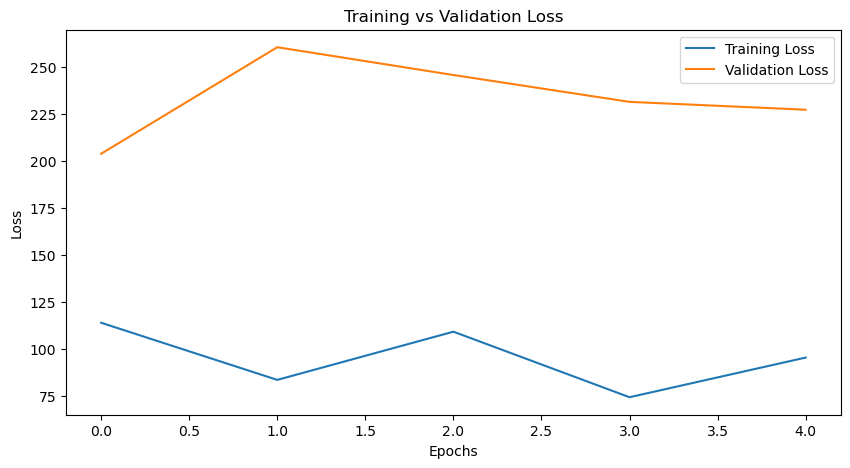

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R² Score: 0.3672


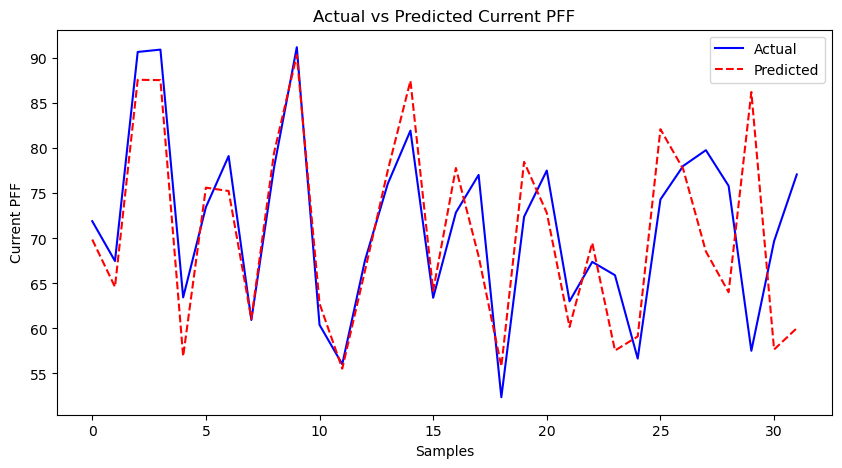

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 67.6925 - val_loss: 211.4585
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 100.7639 - val_loss: 200.3940
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 77.2844 - val_loss: 191.2124
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46.3955 - val_loss: 187.4785
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37.4774 - val_loss: 181.3927
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 142.8947 - val_loss: 163.5542
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 62.4166 - val_loss: 162.4561
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82.4417 - val_loss: 157.9040
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 58.4997 - val_loss: 154.4554
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38.7152 - val_loss: 155.2548


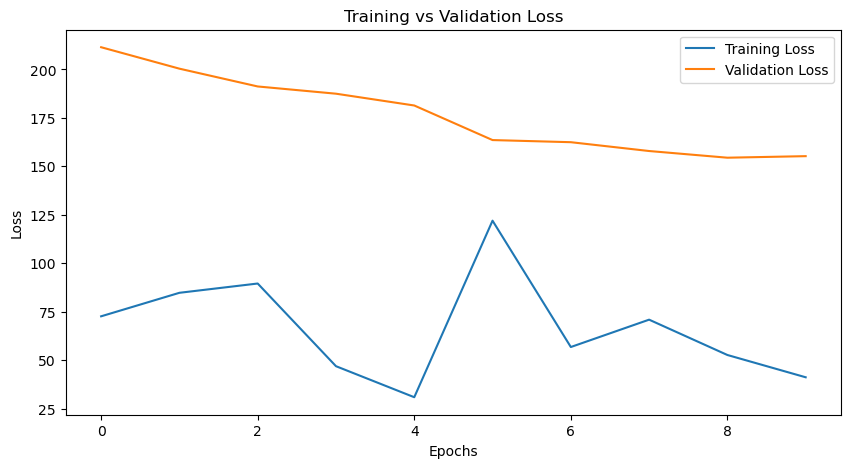

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R² Score: 0.5521


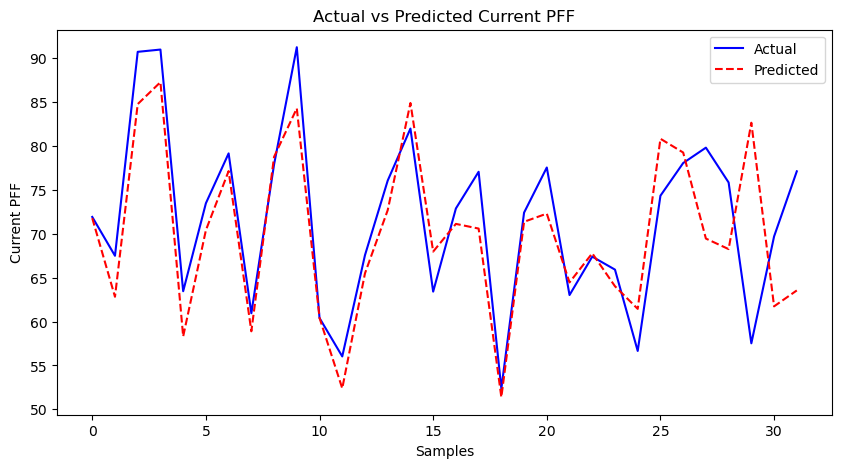

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 103.1839 - val_loss: 159.4266
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 120.5267 - val_loss: 168.0155
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32.7662 - val_loss: 179.7418
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 68.1677 - val_loss: 176.2430
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 83.3583 - val_loss: 172.7280
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69.1423 - val_loss: 175.1151
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 152.1892 - val_loss: 182.9577
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54.0274 - val_loss: 192.9489
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52.1423 - val_loss: 200.3740
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 84.1429 - val_loss: 194.8653
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69.2684 - val_loss: 183.8069
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60

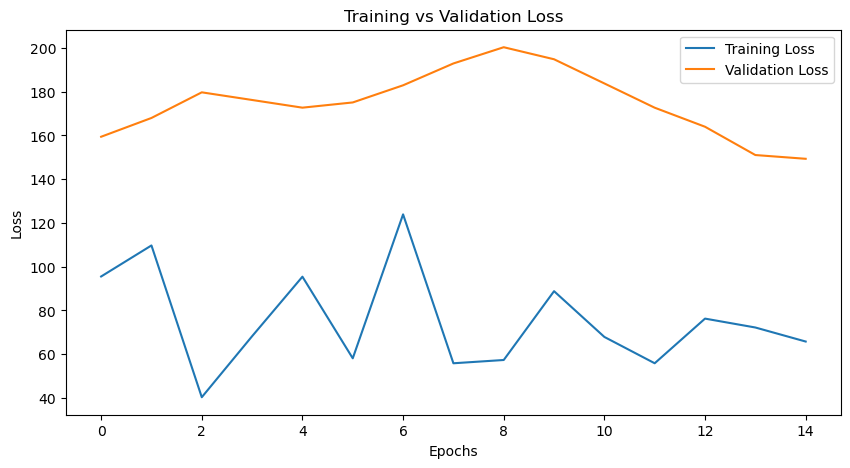

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R² Score: 0.5817


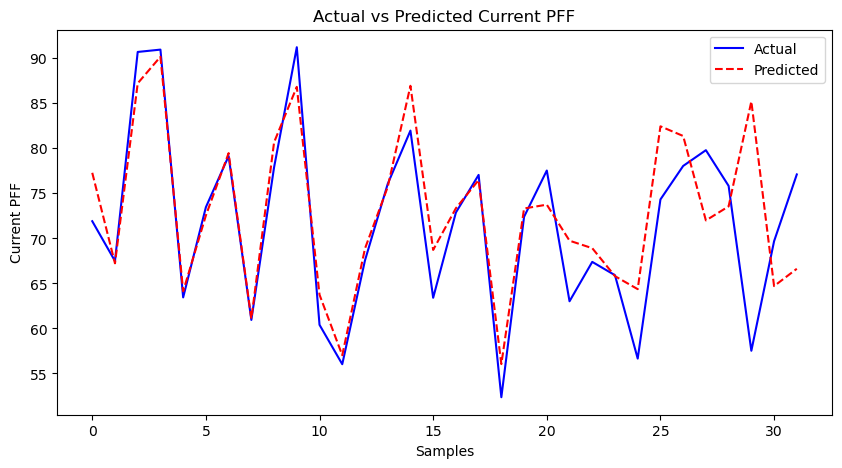

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 129.2035 - val_loss: 161.4880
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 61.1516 - val_loss: 183.5757
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 72.4368 - val_loss: 208.3486
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.8550 - val_loss: 238.6660
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 86.5920 - val_loss: 255.4620
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 80.0619 - val_loss: 252.2551
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.1967 - val_loss: 253.5085
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 85.3473 - val_loss: 248.9368
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 67.7318 - val_loss: 222.5931
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.0862 - val_loss: 205.3062
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 74.1751 - val_loss: 192.3089
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 63.

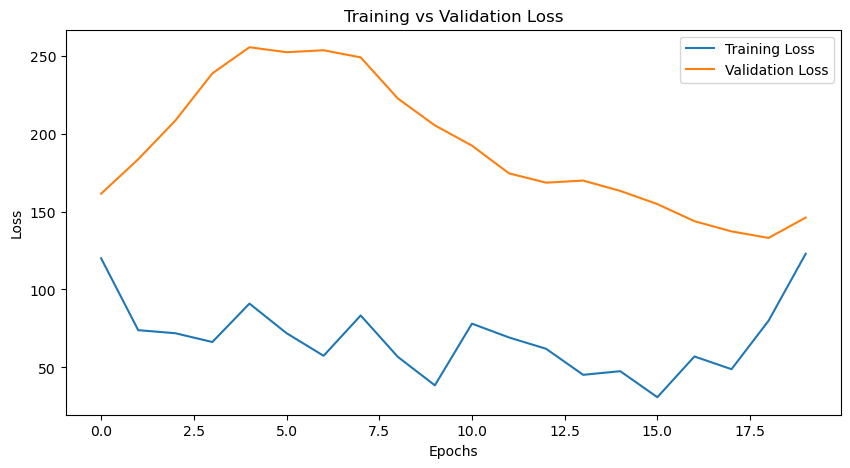

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R² Score: 0.6024


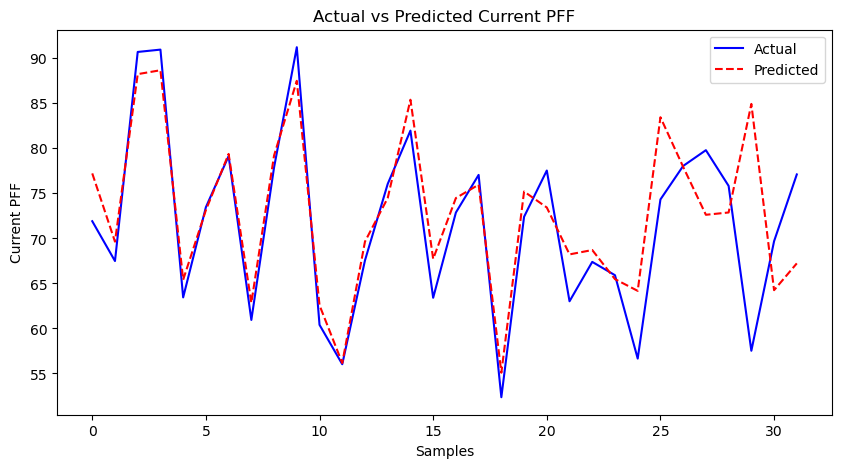

Epoch 1/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 45.1438 - val_loss: 154.6663
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 88.6910 - val_loss: 144.1645
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 49.1431 - val_loss: 172.0704
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 38.1904 - val_loss: 186.4389
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 95.5617 - val_loss: 181.7128
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 76.6302 - val_loss: 164.4100
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 44.0091 - val_loss: 151.4877
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.9460 - val_loss: 151.9013
Epoch 9/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 86.1546 - val_loss: 154.8797
Epoch 10/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 73.3698 - val_loss: 149.1932
Epoch 11/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 51.4889 - val_loss: 150.7898
Epoch 12/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 68.510

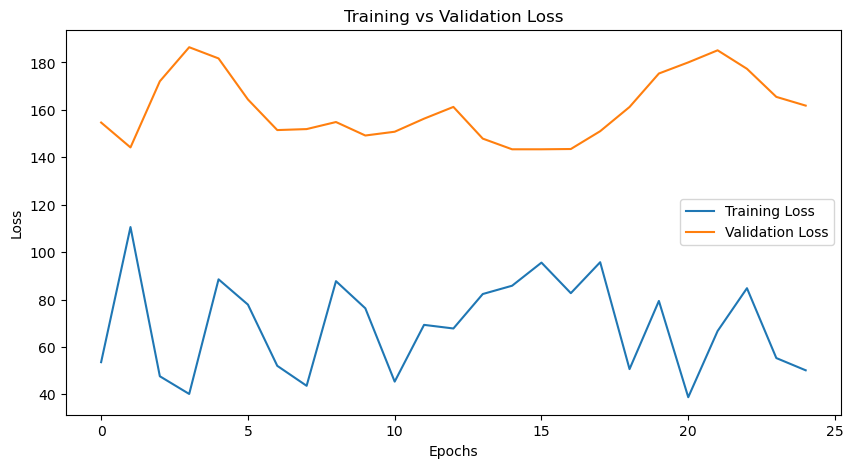

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R² Score: 0.5706


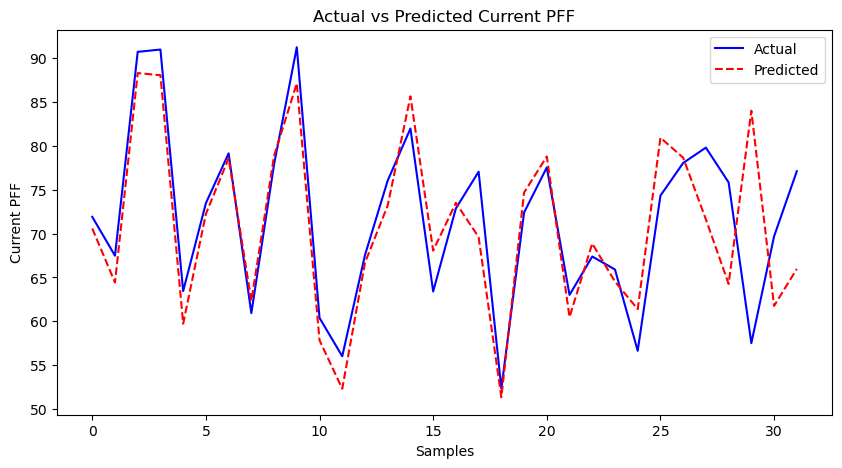

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 69.7087 - val_loss: 160.1143
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 79.4929 - val_loss: 158.8129
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 101.0527 - val_loss: 152.4862
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 57.5296 - val_loss: 145.3827
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 55.2356 - val_loss: 136.4071
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 125.6202 - val_loss: 124.8613
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 108.4053 - val_loss: 148.5669
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 74.5523 - val_loss: 187.3492
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 111.6205 - val_loss: 176.5700
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64.7311 - val_loss: 180.1907
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 61.3073 - val_loss: 201.7048
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6

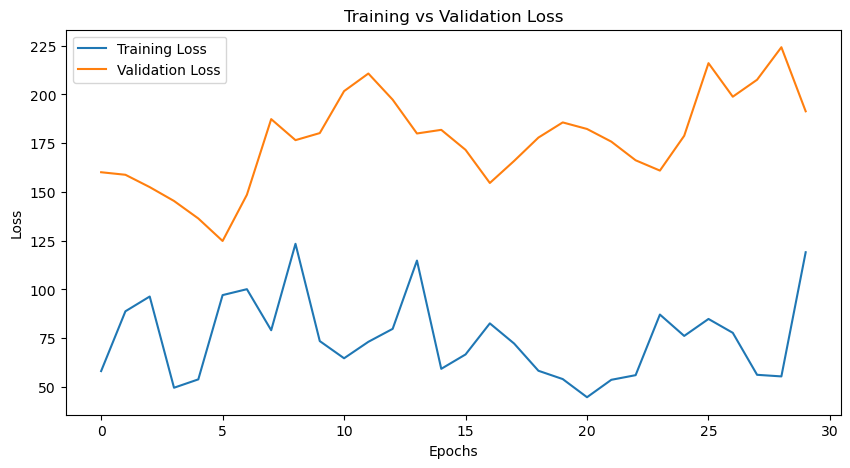

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R² Score: 0.4277


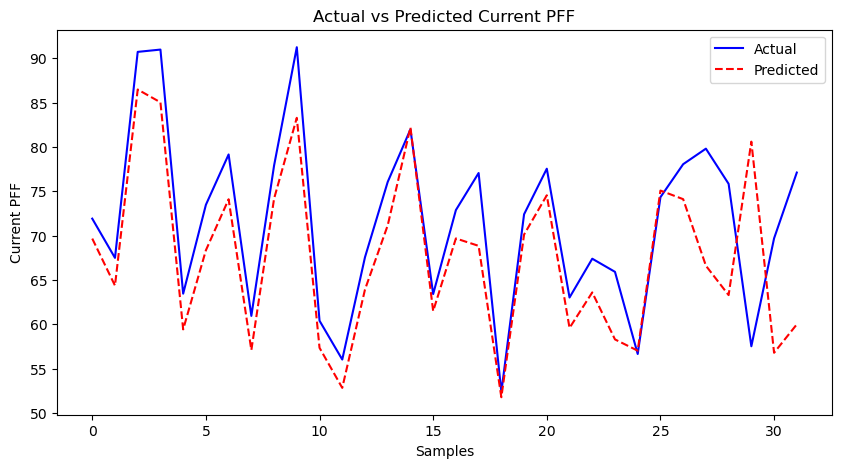

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 59.5224 - val_loss: 158.9505
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 69.9770 - val_loss: 154.9298
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 65.9678 - val_loss: 143.4065
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60.9338 - val_loss: 139.1636
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71.6955 - val_loss: 137.9881
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 61.3372 - val_loss: 133.5454
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 86.7405 - val_loss: 145.7273
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54.1078 - val_loss: 171.8273
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 73.9562 - val_loss: 185.2370
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 53.6216 - val_loss: 186.3954
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 52.2670 - val_loss: 167.5670
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 44.194

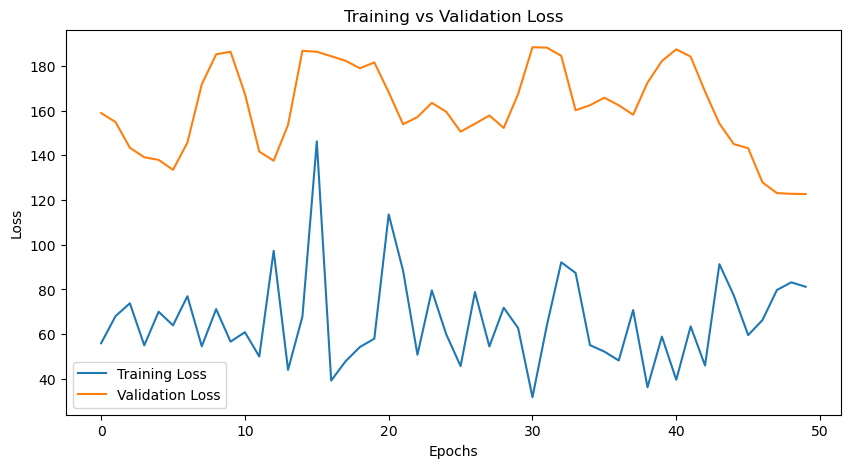

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R² Score: 0.6211


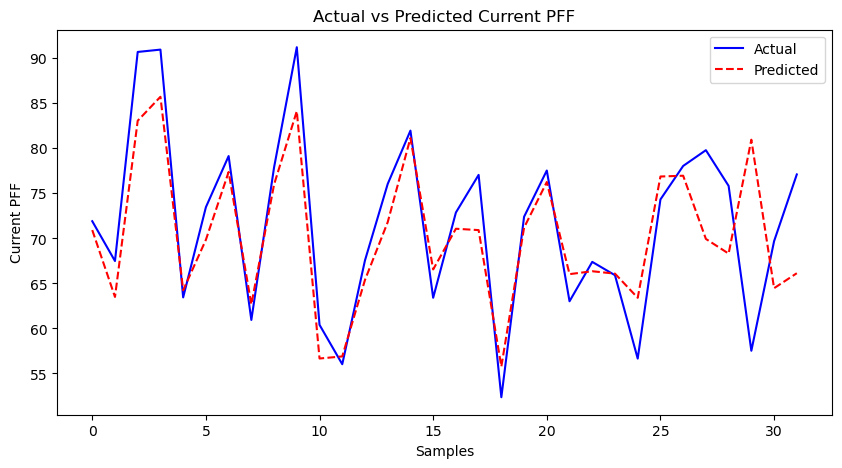

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 68.0268 - val_loss: 126.6068
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 87.8857 - val_loss: 151.5515
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 48.6236 - val_loss: 166.6372
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 78.3535 - val_loss: 168.3645
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 54.4609 - val_loss: 178.2162
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 64.7135 - val_loss: 182.8513
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 51.5804 - val_loss: 182.0669
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 78.3743 - val_loss: 168.3981
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 66.1674 - val_loss: 178.1977
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 71.5940 - val_loss: 186.9924
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 45.0429 - val_loss: 183.6826
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step -

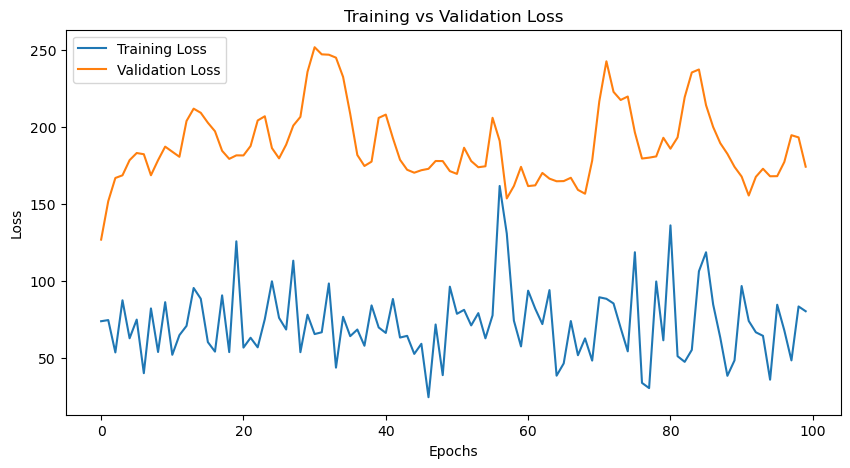

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R² Score: 0.5278


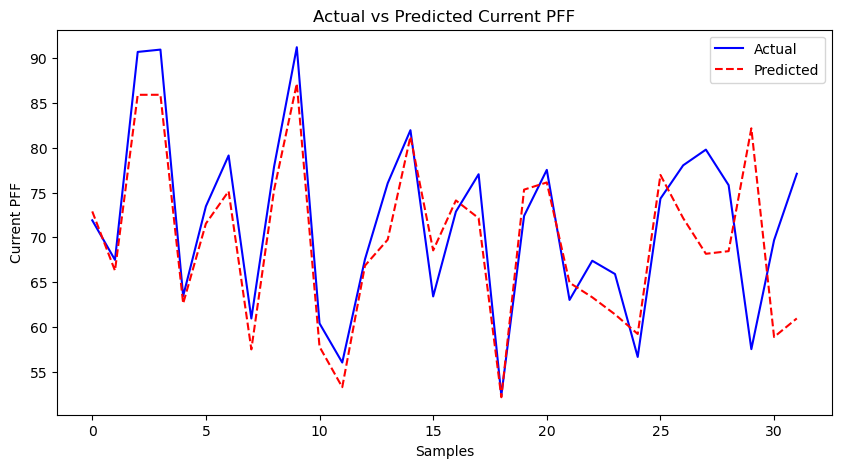

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 36.7792 - val_loss: 165.8051
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 70.4945 - val_loss: 171.7611
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 96.1620 - val_loss: 193.1619
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 118.4162 - val_loss: 200.4687
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 107.7881 - val_loss: 200.4144
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 40.4185 - val_loss: 226.4451
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 113.6422 - val_loss: 222.1460
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 78.2809 - val_loss: 180.2790
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42.4332 - val_loss: 161.1235
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32.1847 - val_loss: 155.5479
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 46.7128 - val_loss: 157.9334
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

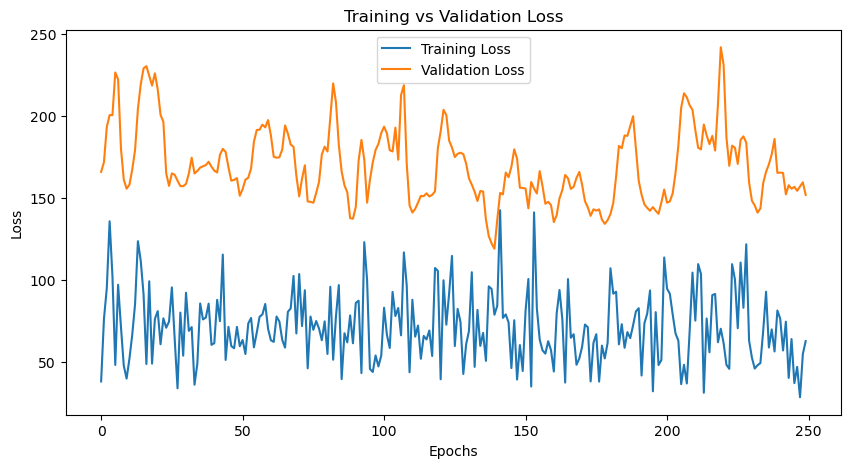

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R² Score: 0.6241


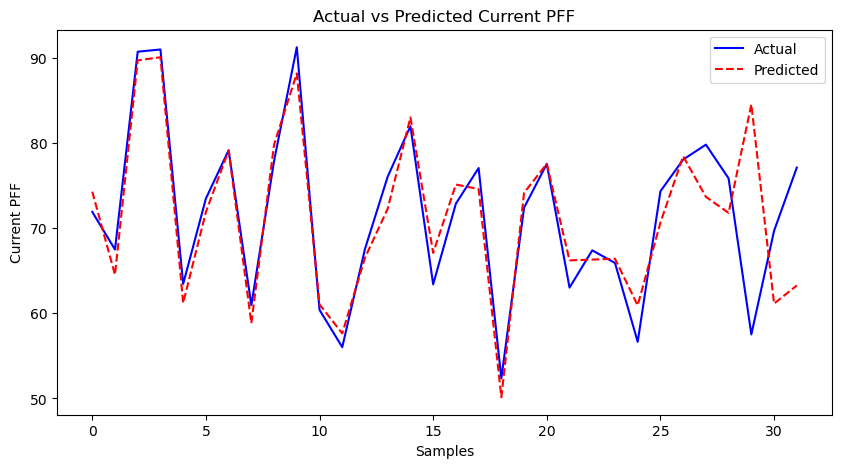

In [226]:
# Train the model
#history = model.fit(X, y, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
epoch_list = [5, 10, 15, 20, 25, 30, 50, 100, 250]
for e in epoch_list:
    history = model.fit(X, y, epochs=e, batch_size=8, validation_split=0.2)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Make predictions on the test set
    y_pred = model.predict(X)
    from sklearn.metrics import r2_score

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Print R² score
    print(f"R² Score: {r2:.4f}")
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(y, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='red', linestyle='dashed')
    plt.title('Actual vs Predicted Current PFF')
    plt.xlabel('Samples')
    plt.ylabel('Current PFF')
    plt.legend()
    plt.show()





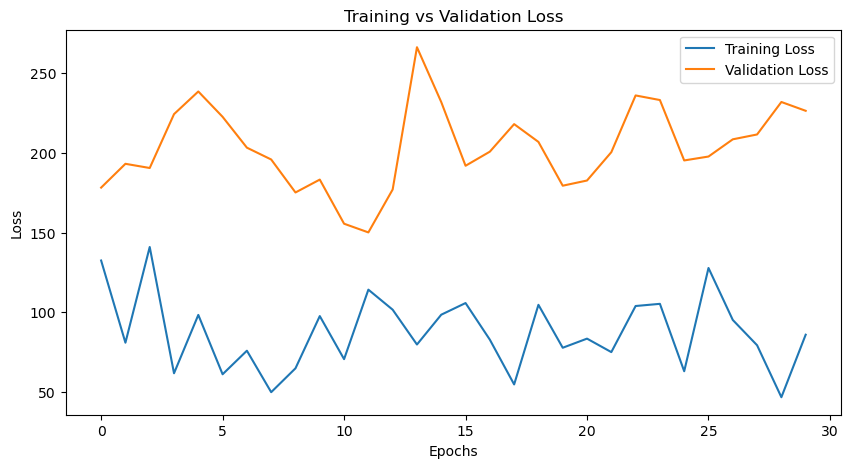

In [223]:
# Plot training & validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
R² Score: 0.3006


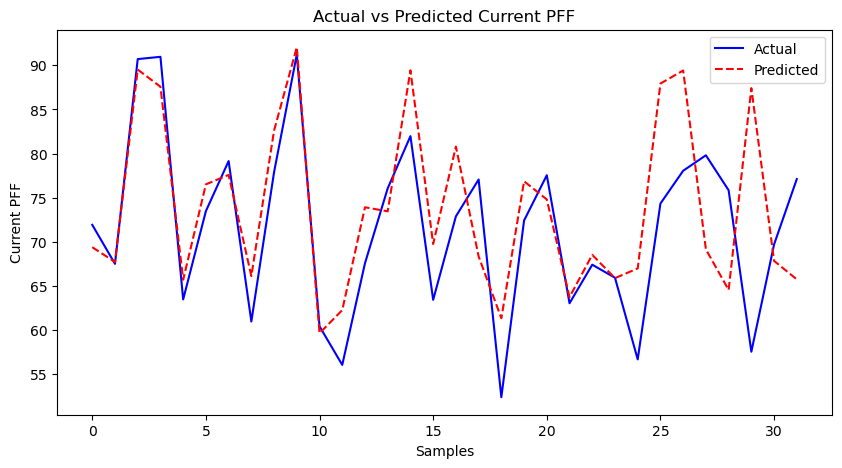

In [224]:
# Make predictions on the test set
y_pred = model.predict(X)
from sklearn.metrics import r2_score

# Calculate R² score
r2 = r2_score(y, y_pred)

# Print R² score
print(f"R² Score: {r2:.4f}")
# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='dashed')
plt.title('Actual vs Predicted Current PFF')
plt.xlabel('Samples')
plt.ylabel('Current PFF')
plt.legend()
plt.show()
